# Predict Bitcoin price
https://www.kaggle.com/myonin/bitcoin-price-prediction-by-arima/notebook

https://www.kaggle.com/smitad/bitcoin-trading-strategy-simulation

In [219]:
# data wrangling package
library(tidyverse)
# time series objects
library(xts)

In [211]:
# Get data using API
library("quantmod")
getSymbols("BTC-USD")
df <- `BTC-USD`
summary(df)

Warning message:
“BTC-USD contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


[1] "BTC-USD"

     Index             BTC-USD.Open      BTC-USD.High      BTC-USD.Low     
 Min.   :2014-09-17   Min.   :  176.9   Min.   :  211.7   Min.   :  171.5  
 1st Qu.:2016-07-08   1st Qu.:  587.5   1st Qu.:  592.0   1st Qu.:  581.1  
 Median :2018-04-30   Median : 5925.5   Median : 6180.0   Median : 5732.5  
 Mean   :2018-04-30   Mean   :10459.4   Mean   :10747.9   Mean   :10143.0  
 3rd Qu.:2020-02-19   3rd Qu.:10111.9   3rd Qu.:10292.2   3rd Qu.: 9732.6  
 Max.   :2021-12-11   Max.   :67549.7   Max.   :68789.6   Max.   :66382.1  
                      NA's   :4         NA's   :4         NA's   :4        
 BTC-USD.Close     BTC-USD.Volume      BTC-USD.Adjusted 
 Min.   :  178.1   Min.   :5.915e+06   Min.   :  178.1  
 1st Qu.:  587.8   1st Qu.:7.591e+07   1st Qu.:  587.8  
 Median : 5930.3   Median :4.788e+09   Median : 5930.3  
 Mean   :10475.8   Mean   :1.420e+10   Mean   :10475.8  
 3rd Qu.:10116.3   3rd Qu.:2.338e+10   3rd Qu.:10116.3  
 Max.   :67566.8   Max.   :3.510e+11   Max.   :675

Here we get 6 values:
I am going to predict the price using the adjusted price. Adjusted price is usually used for backtesting, as it reflects the value for any corporate actions. It is mostly used for analysis.

Looks like there are 4 missing values. Lets take a look at it and the data points around them and see that to do with them.

In [213]:
df <- Ad(df)
colnames(df) <- "Price"
which(rowSums(is.na(df)) != 0)
df[rowSums(is.na(df)) != 0, ]

[1] 2040 2215 2218 2219

           Price
2020-04-17    NA
2020-10-09    NA
2020-10-12    NA
2020-10-13    NA

Lets have a look around the those (April 10th to 20th) and (October 10th to 20th):

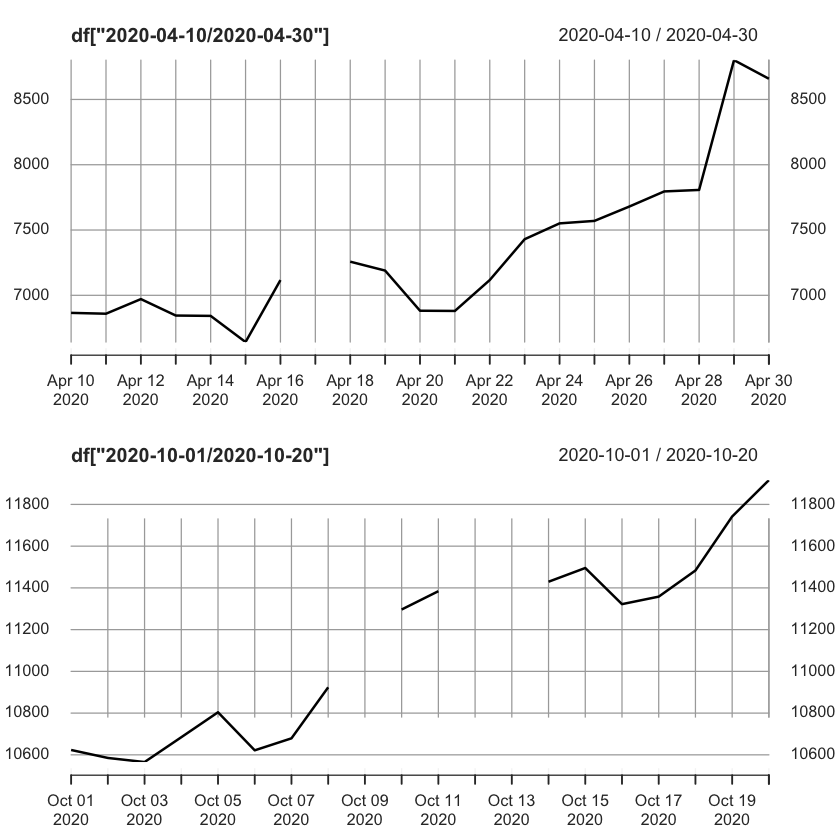

In [214]:
# plot the periods
par(mfrow = c(2, 1))
plot(df["2020-04-10/2020-04-30"], type = "l", col = "black")
plot(df["2020-10-01/2020-10-20"], type = "l", col = "black")

Here I have decided to fill the NAs with linear approximation.

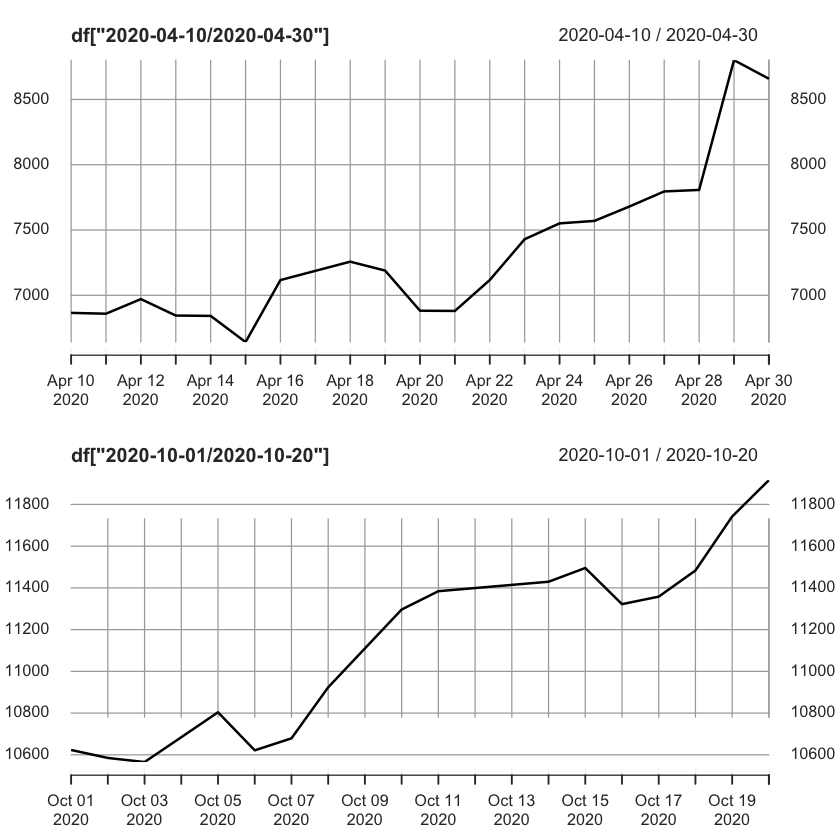

In [215]:
# fill NAs with linear approximation
df <- na.approx(df)

# plot the periods
par(mfrow = c(2, 1))
plot(df["2020-04-10/2020-04-30"], type = "l", col = "black")
plot(df["2020-10-01/2020-10-20"], type = "l", col = "black")

Looks nice. Next I am going to plot the price to have an inital view.

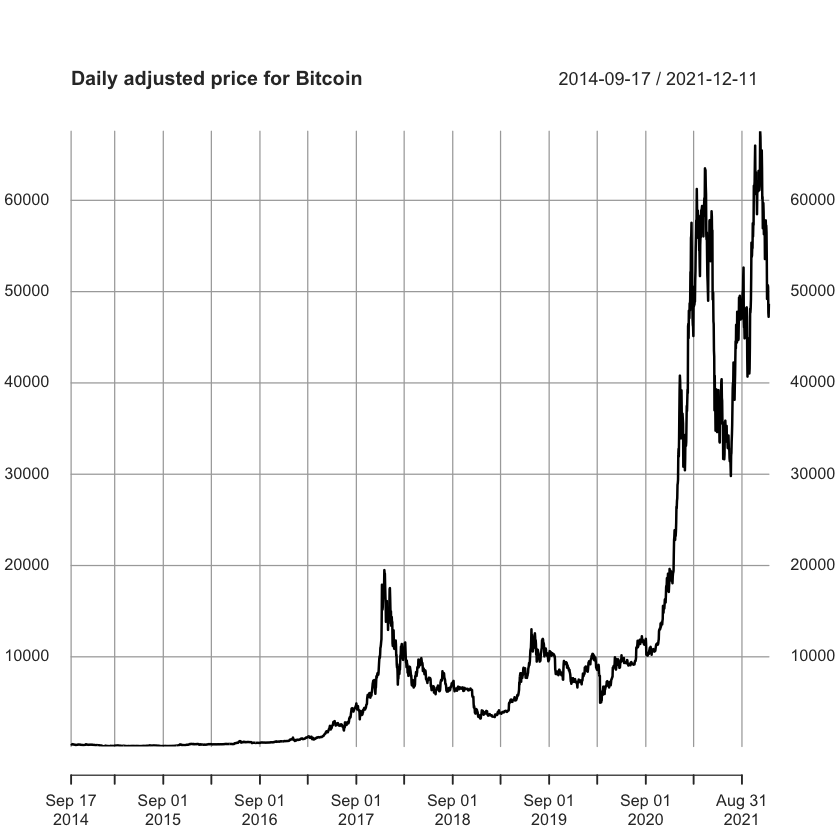

In [218]:
plot(df, col = "black", main = "Daily adjusted price for Bitcoin")

In [237]:
head(df_monthly)
summary(df["2020-09-01/2020-09-30"])


         df.Open df.High  df.Low df.Close
Sep 2014 457.334 457.334 375.467  386.944
Oct 2014 383.615 400.870 320.510  338.321
Nov 2014 325.749 423.561 325.749  378.047
Dec 2014 379.245 381.315 310.737  320.193
Jan 2015 314.249 315.032 178.103  217.464
Feb 2015 226.972 257.321 217.111  254.263

     Index                Price      
 Min.   :2020-09-01   Min.   :10132  
 1st Qu.:2020-09-08   1st Qu.:10365  
 Median :2020-09-15   Median :10692  
 Mean   :2020-09-15   Mean   :10660  
 3rd Qu.:2020-09-22   3rd Qu.:10836  
 Max.   :2020-09-30   Max.   :11970  

Try sampling monthly, quarterly and yearly to see if there is a pattern.

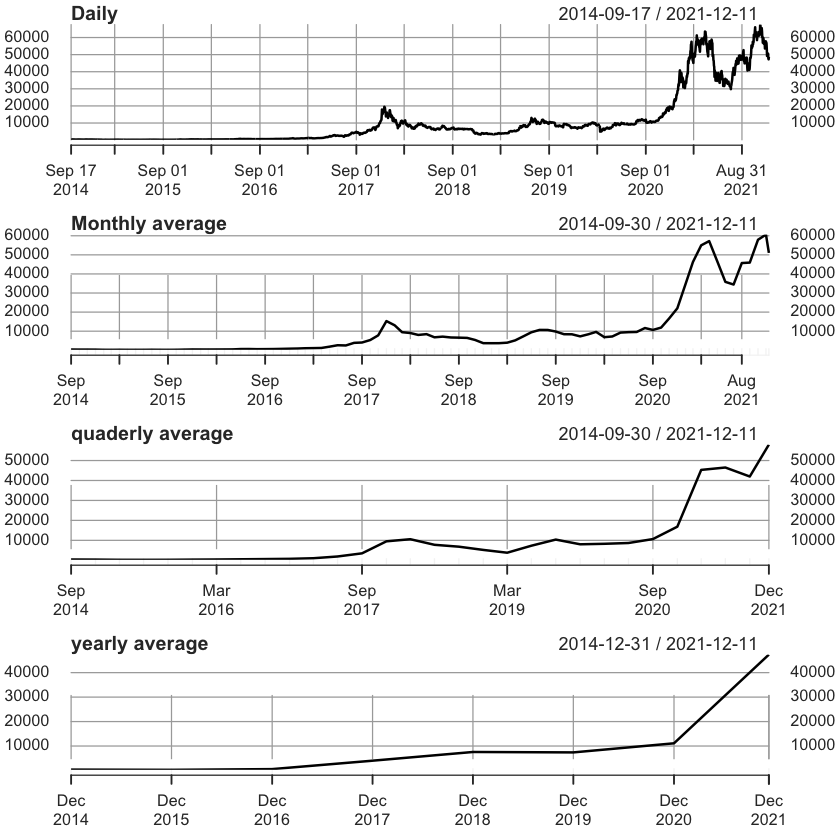

In [241]:
# 4 plots in one
par(mfrow=c(4, 1))

# turn the data to a xts object
plot(df, main = "Daily")

# monlthy
df_monthly <- apply.monthly(df, mean)
plot(df_monthly, main = "Monthly average")

# quad yearly
df_quaderly <- apply.quarterly(df, mean)
plot(df_quaderly, main = "quaderly average")

# yearly
df_yearly <- apply.yearly(df, mean)
plot(df_yearly, main = "yearly average")

Daily data fluctuates too much, quaderly and yearly has too little movement. Therefore I will use the the monthly average data instead.

Variance fluctuates. Take a log to reduce varience 

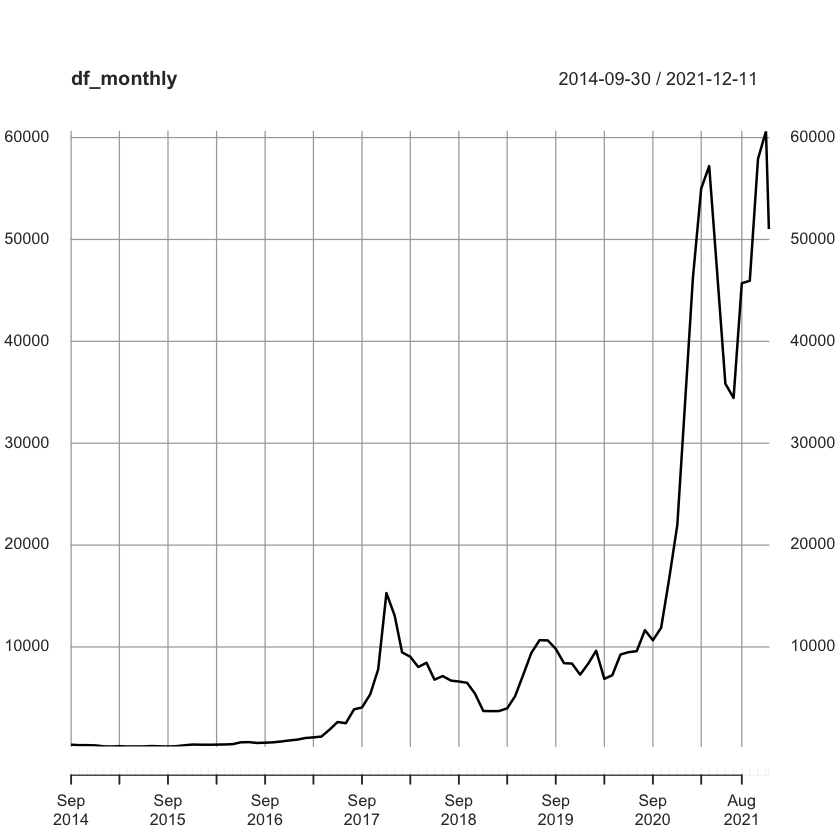

In [244]:
plot(df_monthly)